In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Background

In [2]:
from scripts.kernel_solvers import predict, solve_l2_problem

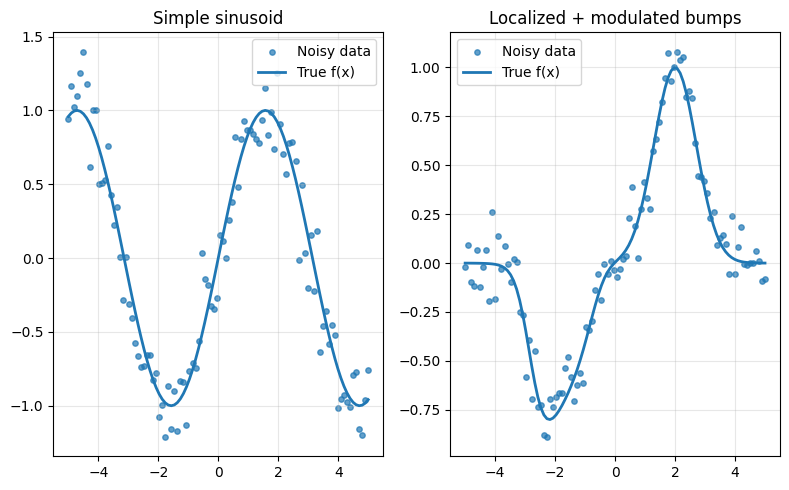

In [3]:
# Toy dataset
n = 100

X = np.linspace(-5, 5, n).reshape(-1, 1)
X_test = np.linspace(-6, 6, 100).reshape(-1, 1)

y_sin_star = np.sin(X).ravel()
y_sin = y_sin_star + 0.2 * np.random.randn(n)

y_2_star = (
    np.exp(-(X - 2)**2)                          # bump near +2
    - 0.8 * np.exp(-(X + 2 + 0.2*np.sin(2*X))**2)  # distorted bump near -2
).ravel()

y_2 = y_2_star + 0.1 * np.random.randn(n)

fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].scatter(X, y_sin, s=15, alpha=0.7, label="Noisy data")
ax[0].plot(X, y_sin_star, lw=2, label="True f(x)")
ax[0].set_title("Simple sinusoid")
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].scatter(X, y_2, s=15, alpha=0.7, label="Noisy data")
ax[1].plot(X, y_2_star, lw=2, label="True f(x)")
ax[1].set_title("Localized + modulated bumps")
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()


In [4]:
alpha = solve_l2_problem(X,y_sin)
alpha_2 = solve_l2_problem(X, y_2,reg=1e-3, sigma=0.7)

y_pred1 = predict(X_test, X, alpha)
y_pred2 = predict(X_test, X, alpha_2)

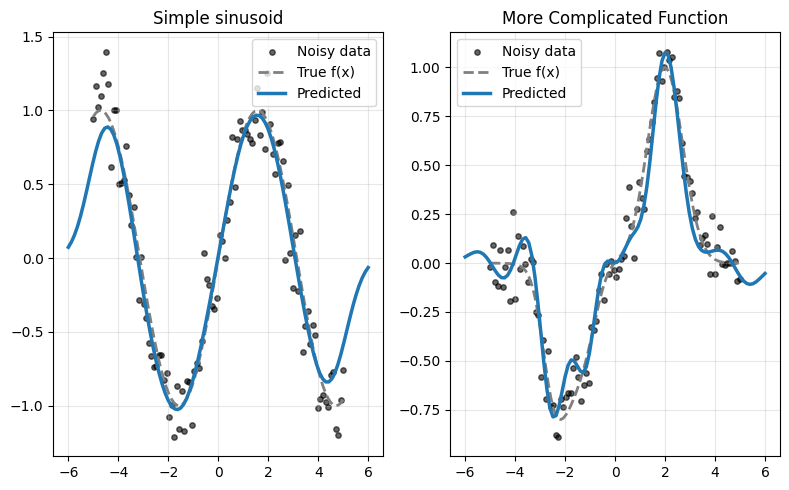

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].scatter(X, y_sin, s=15, alpha=0.6, label="Noisy data", marker="o",color="black")
ax[0].plot(X, y_sin_star, label="True f(x)", linestyle="--", color="grey", linewidth=2)
ax[0].plot(X_test,y_pred1,label="Predicted",color = "#1f77b4", linewidth=2.5)
ax[0].set_title("Simple sinusoid")
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].scatter(X, y_2, s=15, alpha=0.6, label="Noisy data", marker="o",color="black")
ax[1].plot(X, y_2_star, lw=2, label="True f(x)",linestyle="--", color="grey")
ax[1].plot(X_test,y_pred2,label="Predicted",color = "#1f77b4", linewidth=2.5)
ax[1].set_title("More Complicated Function")
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("figures/KRR_example.png", dpi=250)


## Nystrom Method

In [6]:
from scripts.kernel_solvers import solve_l2_problem_Nystrom

n = 1000

X = np.linspace(-5, 5, n).reshape(-1, 1)
X_test = np.linspace(-6, 6, 100).reshape(-1, 1)

y_sin_star = np.sin(X).ravel()
y_sin = y_sin_star + 0.2 * np.random.randn(n)

y_2_star = (
    np.exp(-(X - 2)**2)                          # bump near +2
    - 0.8 * np.exp(-(X + 2 + 0.2*np.sin(2*X))**2)  # distorted bump near -2
).ravel()

y_2 = y_2_star + 0.1 * np.random.randn(n)


In [7]:
sigma = 1.0
reg   = 1e-2
m     = 50

alpha_sin = solve_l2_problem(X, y_sin, sigma=sigma, reg=reg)
beta_sin, idx_sin = solve_l2_problem_Nystrom(X, y_sin, m=m, sigma=sigma, reg=reg)

y_pred_sin_vanilla = predict(X_test, X, alpha_sin)
y_pred_sin_nys     = predict(X_test, X[idx_sin], beta_sin)

# --- Function 2 : bump function
alpha_2 = solve_l2_problem(X, y_2, sigma=sigma, reg=reg)
beta_2, idx_2 = solve_l2_problem_Nystrom(X, y_2, m=m, sigma=sigma, reg=reg)

y_pred_2_vanilla = predict(X_test, X, alpha_2)
y_pred_2_nys     = predict(X_test, X[idx_2], beta_2)


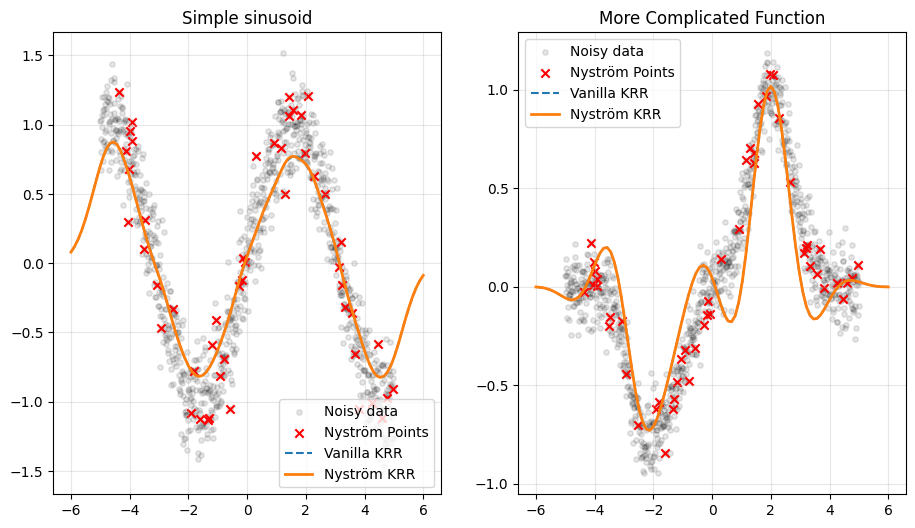

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6))

# Plot points
ax[0].scatter(X, y_sin, s=15, alpha=0.1, label="Noisy data", marker="o",color="black")
ax[0].scatter(X[idx_sin], y_sin[idx_sin], label="Nyström Points",marker="x",color="red")
ax[0].plot(X_test, y_pred_sin_vanilla, label="Vanilla KRR", linestyle="--")
ax[0].plot(X_test, y_pred_sin_nys, lw=2, label="Nyström KRR")
ax[0].set_title("Simple sinusoid")
ax[0].legend(loc="best")
ax[0].grid(alpha=0.3)

# Plot points
ax[1].scatter(X, y_2, s=15, alpha=0.1, label="Noisy data", marker="o",color="black")
ax[1].scatter(X[idx_sin], y_2[idx_sin], label="Nyström Points",marker="x",color="red")
ax[1].plot(X_test, y_pred_2_vanilla, label="Vanilla KRR", linestyle="--")
ax[1].plot(X_test, y_pred_2_nys, lw=2, label="Nyström KRR")
ax[1].set_title("More Complicated Function")
ax[1].legend(loc="best")
ax[1].grid(alpha=0.3)

plt.savefig("figures/nystrom_toy.png")

## Falkon

In [9]:
from scripts.kernel_solvers import solve_falkon

n = 1000

X = np.linspace(-5, 5, n).reshape(-1, 1)
X_test = np.linspace(-6, 6, 100).reshape(-1, 1)

y_sin_star = np.sin(X).ravel()
y_sin = y_sin_star + 0.2 * np.random.randn(n)

In [10]:
sigma = 0.1
reg   = 1e-10
m     = 500

alpha,idx = solve_falkon(X, y_sin, m=m, sigma=sigma, lam=reg)
y_pred = predict(X_test, X[idx], alpha)

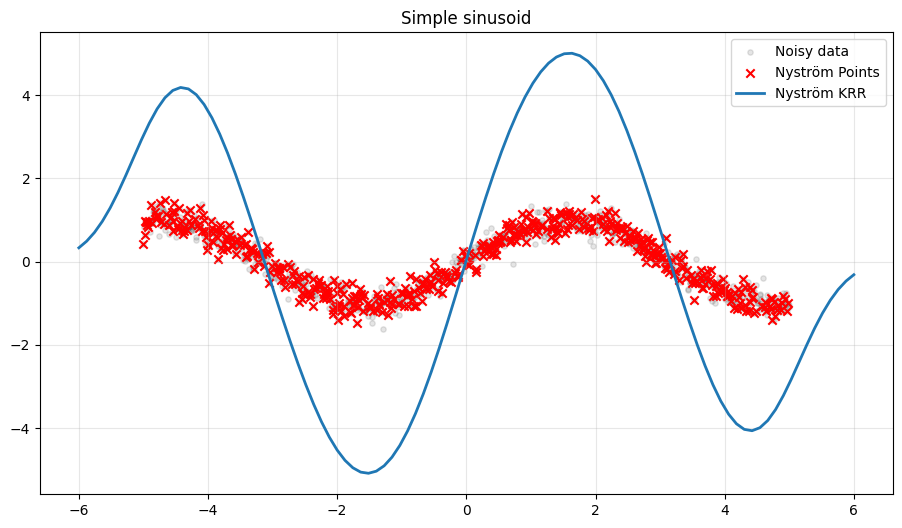

In [11]:
# Plot points
fig, ax = plt.subplots(1, 1, figsize=(11, 6))

ax.scatter(X, y_sin, s=15, alpha=0.1, label="Noisy data", marker="o",color="black")
ax.scatter(X[idx], y_sin[idx], label="Nyström Points",marker="x",color="red")
ax.plot(X_test, y_pred, lw=2, label="Nyström KRR")
ax.set_title("Simple sinusoid")
ax.legend(loc="best")
ax.grid(alpha=0.3)

## Time Benchmarking

In [22]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("bench_all_methods.csv")
df.head()

,method,n,m,time_sec
0,Vanilla,100,NaN,0.001833
1,Vanilla,151,NaN,0.002405
2,Vanilla,231,NaN,0.007776
3,Vanilla,351,NaN,0.015811
4,Vanilla,533,NaN,0.038736


In [40]:
def estimate_scaling_after_cutoff(df, n_min=1e3):
    results = {}

    for method, g in df.groupby("method"):
        # Apply cutoff
        g = g[g["n"] >= n_min]
        n = g["n"].to_numpy()
        t = g["time_sec"].to_numpy()
        alpha, logC = np.polyfit(np.log(n), np.log(t), 1)

        results[method] = {
            "alpha": alpha,
            "C": np.exp(logC),
            "n_min": n_min,
            "num_points": len(g)
        }
        print(
            f"{method:8s} | slope = {alpha:.3f} "
            f"(fit on {len(g)} pts, n >= {int(n_min)})"
        )

    return results


In [41]:
results = estimate_scaling_after_cutoff(df, n_min=1e3)


Falkon   | slope = 1.425 (fit on 14 pts, n >= 1000)
Nystrom  | slope = 1.430 (fit on 14 pts, n >= 1000)
Vanilla  | slope = 2.931 (fit on 6 pts, n >= 1000)


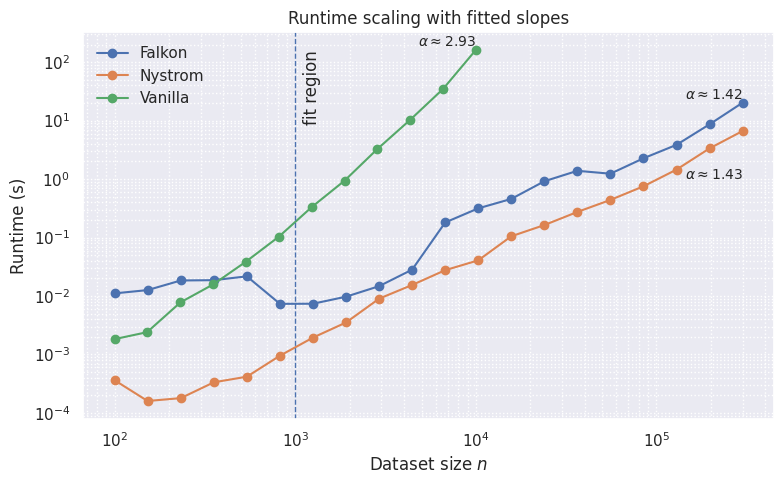

In [63]:
plt.figure(figsize=(8,5))

# Plot data
for method, g in df.groupby("method"):
    g = g.sort_values("n")
    plt.loglog(g["n"], g["time_sec"], "o-", label=method)

    # --- annotate slope ---
    if method in results:
        alpha = results[method]["alpha"]

        # choose rightmost point to place annotation
        n_annot = g["n"].iloc[-1]
        t_annot = g["time_sec"].iloc[-1]

        if method=="Nystrom":
             plt.text(
            n_annot,
            t_annot * 0.15,
            rf"$\alpha \approx {alpha:.2f}$",
            fontsize=10,
            ha="right",
             )
        else:
            plt.text(
                n_annot,
                t_annot * 1.15,
                rf"$\alpha \approx {alpha:.2f}$",
                fontsize=10,
                ha="right",
            )

# cutoff marker
plt.axvline(1e3, linestyle="--", linewidth=1)
plt.text(1.1e3, 1e1, r"fit region", rotation=90)

# cosmetics
plt.xlabel("Dataset size $n$")
plt.ylabel("Runtime (s)")
plt.title("Runtime scaling with fitted slopes")
plt.grid(True, which="both", linestyle=":")
plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("figures/scale_laxws.png", dpi=250)
